In [1]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from transformers import T5Tokenizer, T5ForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
 #Check if GPU is available or not 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
# Load Pretrained CNN (ResNet50) for Feature Extraction
resnet = models.resnet50(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # Remove last FC layer
resnet = resnet.to(device)
resnet.eval()

C:\Users\srila\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\srila\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [4]:
# Load Pretrained T5 Transformer for Report Generation
tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small").to(device)


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [5]:
# Image Preprocessing Function
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)
    return image

In [6]:
 #Feature Extraction from X-ray/MRI using ResNet50
def extract_features(image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        features = resnet(image)
    return features.view(-1).cpu().numpy()

In [7]:
# Generate Medical Report using T5 Transformer
def generate_medical_report(image_features):
    input_text = "Generate a medical report for given X-ray scan: abnormalities detected, mild cardiomegaly present."
    input_ids = tokenizer.encode(input_text, return_tensors="pt").to(device)
    output = t5_model.generate(input_ids, max_length=100)
    return tokenizer.decode(output[0], skip_special_tokens=True)

In [8]:
# Load and Process an Example Medical Image
image_path = r"C:\\Users\\srila\\OneDrive\\Desktop\\ref\\Chest_X-ray.jpg"
 # Replace with your image
features = extract_features(image_path)


In [9]:
# Generate Report
medical_report = generate_medical_report(features)


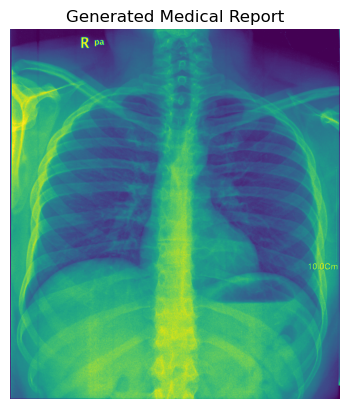


🔍 AI-Generated Medical Report:
Generate a medical report for given X-ray scan: abnormalities detected, mild cardiomegaly present.


In [10]:
# Display Image and Report
plt.imshow(Image.open(image_path))
plt.axis("off")
plt.title("Generated Medical Report")
plt.show()

print("\n🔍 AI-Generated Medical Report:")
print(medical_report)